# Final Project

In [1]:
# Import statements
import os
import re
import nltk
import pandas as pd
import numpy as np
from afinn import Afinn
import matplotlib.pyplot as plt

In [3]:
# Function to create the dataframe of tweets and list of accounts
def create_df(c):
    df = pd.DataFrame()
    names = []
    for f in os.listdir("tweets/%s" % c):
        if (f.endswith(".csv")):
            try:
                dft = pd.read_csv("tweets/%s/%s" % (c, f))[['username', 'text']]
                df = pd.concat([df, dft])

                # parse output_name.csv string
                names.append(f[7:][:-4])
            except:
                print(f)
    df = df[['username', 'text']].copy().dropna()
    return df, names

In [4]:
# Create dataframes for each category
categories = ["fast food", "airlines", "leagues", "colleges", "tech giants", "streaming platforms", "news", "celebrities"]

fast_food, ff_names = create_df(categories[0])
airlines, al_names = create_df(categories[1])
leagues, lg_names = create_df(categories[2])
colleges, cl_names = create_df(categories[3])
tech, tg_names = create_df(categories[4])
streaming, st_names = create_df(categories[5])
news, nw_names = create_df(categories[6])
celebs, cb_names = create_df(categories[7])

In [5]:
print(cb_names, tg_names)

['lizzo', 'ArianaGrande', 'jimmyfallon', 'amyschumer', 'JLo', 'TheRock', 'VancityReynolds', 'KevinHart4real', 'chrissyteigen', 'ReeseW'] ['IBM', 'fitbit', 'Tesla', 'Snapchat', 'Microsoft', 'facebook', 'Intel', 'twitter', 'Uber', 'amazon']


In [6]:
stopwords = nltk.corpus.stopwords.words("english")

# Clean tweets for sentiment analysis
def get_clean_words(words):
    def _isnum(w):
        try:
            int(w)
            return True
        except ValueError:
            return False
        
    # Set words to lowercase and remove them if they are stop words
    words = [w.lower() for w in words if w.lower() not in stopwords]

    # Remove punctuation
    words = [w.replace('(', '') for w in words]
    words = [w.replace(')', '') for w in words]
    words = [w.replace('?', '') for w in words]
    words = [w.replace(',', '') for w in words]
    words = [w.replace('.', '') for w in words]
    words = [w.replace('"', '') for w in words]
    words = [w.replace('!', '') for w in words]
    words = [w.replace(':', '') for w in words]
    words = [w.replace('&amp;', '') for w in words]
    words = [w.replace('/', '') for w in words]
    words = [w.replace('[', '') for w in words]
    words = [w.replace(']', '') for w in words]
    
    # Remove numbers
    words = [w for w in words if not _isnum(w)]
    
    # Remove links
    words = [w for w in words if 'http' not in w]
        
    # Remove hashtags
    words = [w for w in words if not w.startswith("#")]
    
    # Remove mentions
    words = [w for w in words if not w.startswith("@")]
    
    # Only keep words with more than one character
    words = [w for w in words if len(w) > 1]    
    w = " ".join(words)
    return w

In [7]:
# Funtion to pass each tweet into the clean words function and create a new list
def clean_tweets(df):
    new_text = []
    for i in range(len(df)):
        new_text.append(get_clean_words(df['text'].values[i].split()))
    df.text = new_text

In [8]:
# Clean tweets for each category
clean_tweets(fast_food)
clean_tweets(airlines)
clean_tweets(leagues)
clean_tweets(colleges)
clean_tweets(streaming)
clean_tweets(news)
clean_tweets(tech)
clean_tweets(celebs)

In [11]:
dfs = [fast_food, airlines, leagues, colleges, tech, streaming, news, celebs]
print(np.shape(dfs[0].text))

(96890,)


parties getting wild careful tonight meet freaky fast® order button life got whole lot easier i'm really sorry hold today give store call see what's up love love i'm sorry let store know right away ma


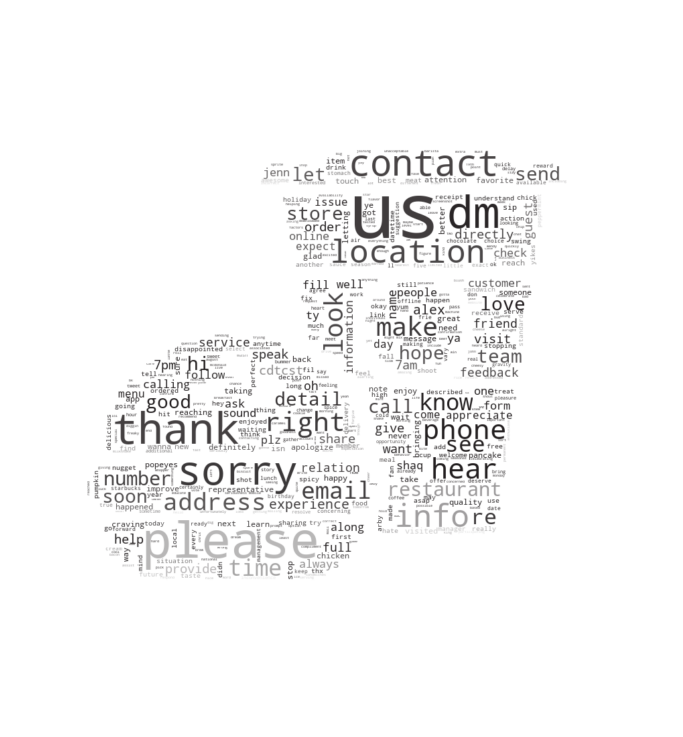

celebrate served special menu us flights today happy thanksgiving brings team-talk like never before enter locker room prepared surprises today welcome yet another cruise ship doha port msc cruises’ f


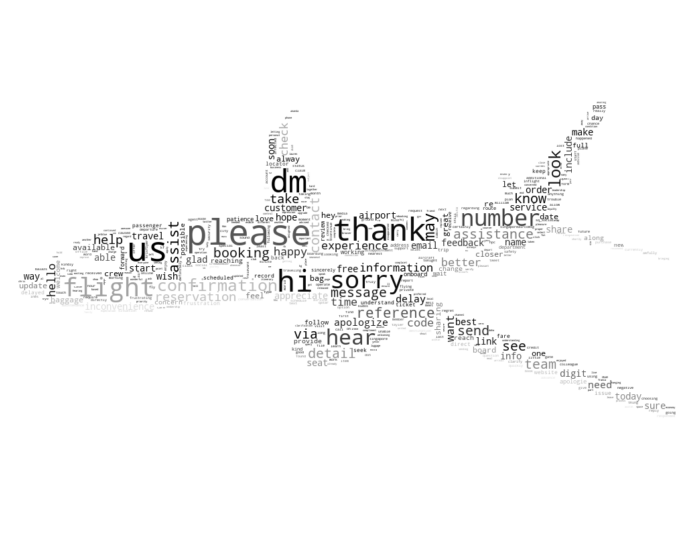

we're especially thankful baseball hot corner stacked all-mlb pick top class vote all-mlb don’t stop short telling us choice vote all-mlb team officially name derek shelton manager shelton spent past 


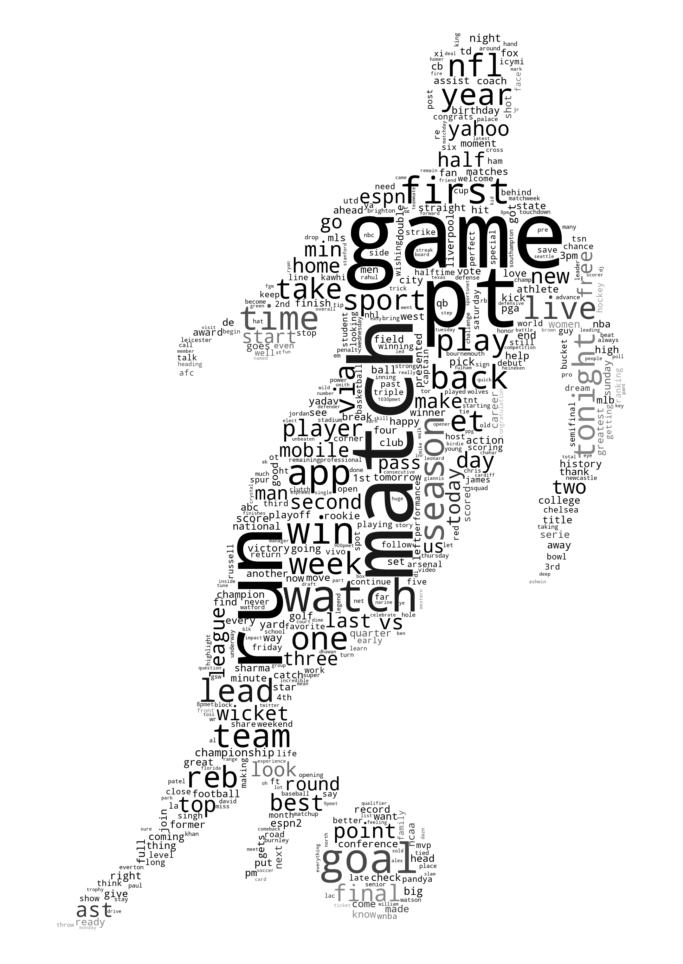

overeating fighting politics—the spirit actually good health experts note six thanksgiving traditions good body soul listen need ideas eat moderation one usc study might provide fun inspiration via jo


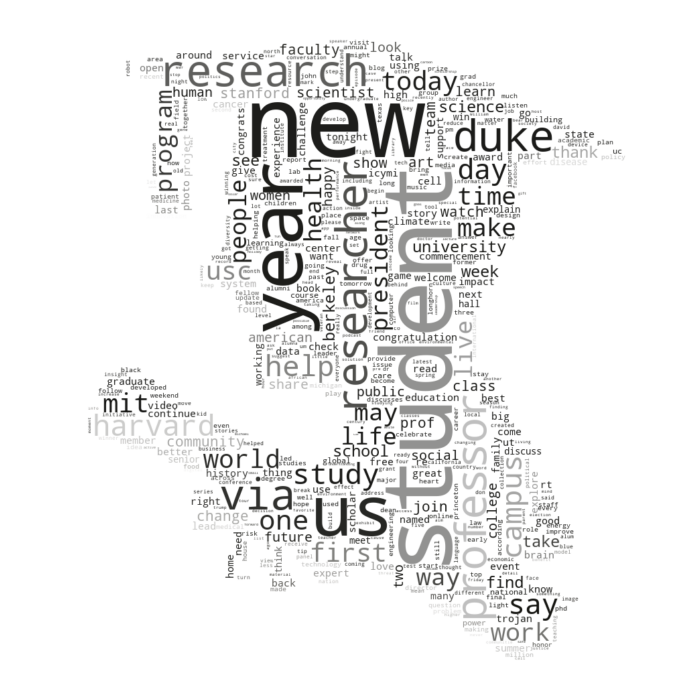

here's made one hottest songs right now—yellow hearts listen today's top hits king fall back listen new single right step studio learn new album viva latino changes shape again discover enhanced album


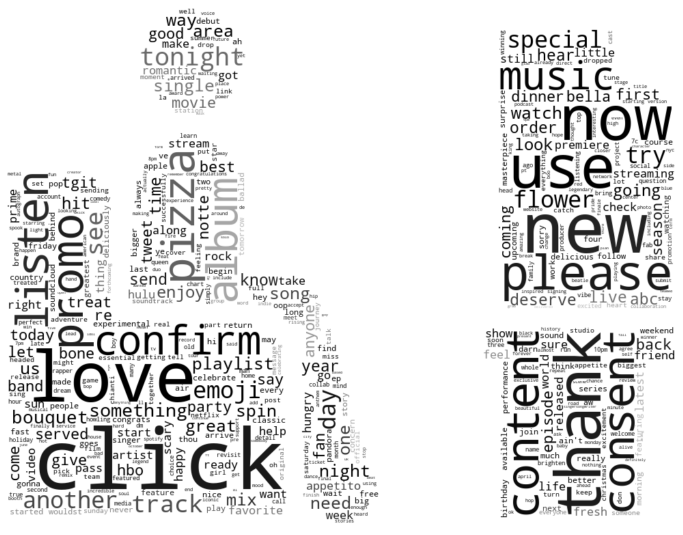

toilet paper always free students college asking tampons ken cuccinelli walked bar martin o’malley lit him review kfc’s nashville chicken waffles sticky situation perspective different politics family


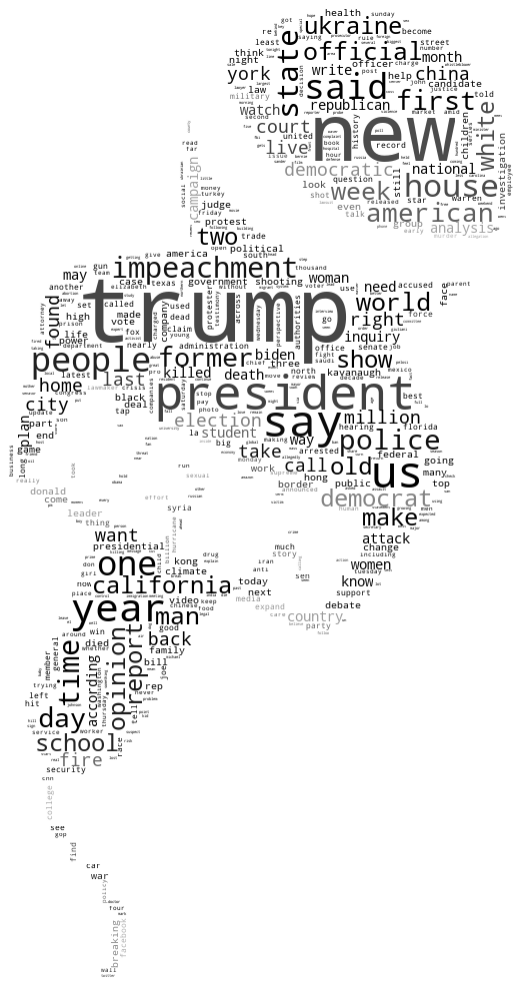

 we're quite sure socks pick ibm socks merchandise store here love hearing stories like this elizabeth thanks sharing keep coding awesome kind family thanks sharing leora keep coding awww thanks here'


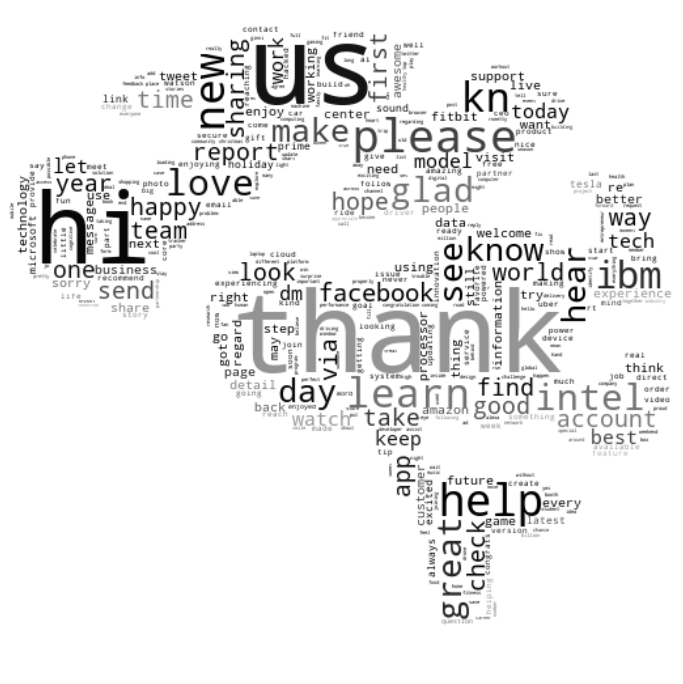

love grew cogic family church detroit music vehicle higher power like catch spirit stage don’t know way period people making calls label can’t wait y’all discover lingerie love soulmate supposed 2nd s


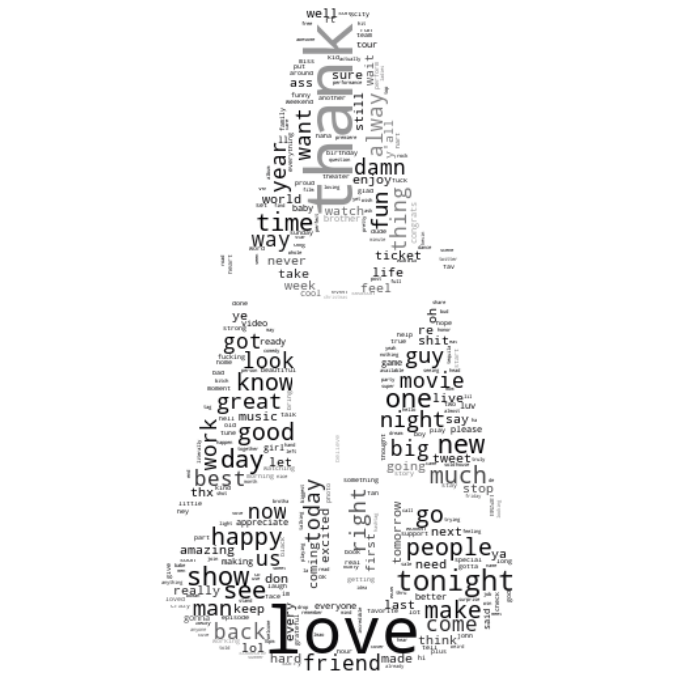

In [13]:
import wordcloud
import matplotlib.pylab as plt
from PIL import Image

images = ["fastfood3.png", "airplane3.png", "soccerplayer.jpg", "gradcap6.jpg", "brain1.png", "watchingtv2.png", "news.jpg", "celeb2.png"]

for i in range(len(images)):
    char_mask = np.array(Image.open("image_masks/" + images[i]))    
    image_colors = wordcloud.ImageColorGenerator(char_mask)

    fig = plt.figure(figsize=(12, 18))
    text = ' '.join(list(dfs[i].text))
    print(text[:200])
    wc = wordcloud.WordCloud(background_color="white", max_words=500, width=400, height=400, mask=char_mask, collocations=False, random_state=1)
    wc.generate(text)
    plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
    plt.axis("off")
    plt.show()
    fig.savefig('wordclouds/' + categories[i] + '.png')

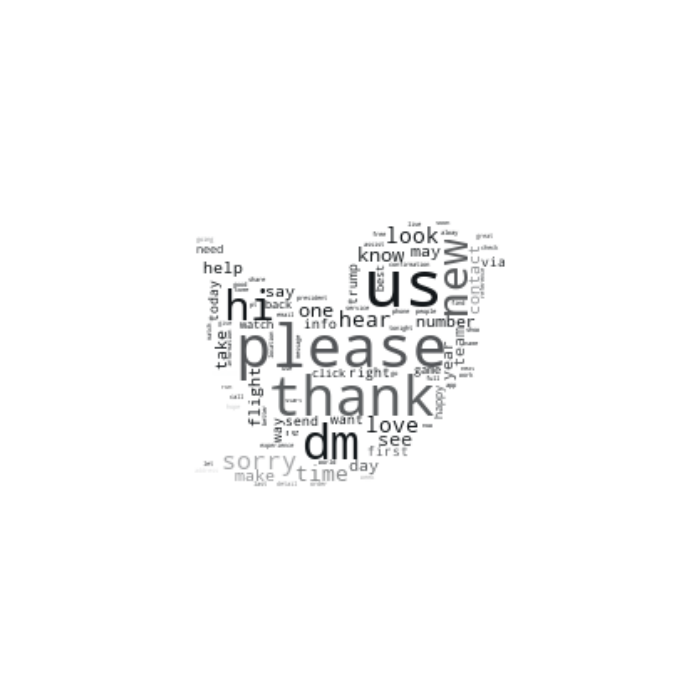

In [14]:
char_mask = np.array(Image.open("image_masks/twitter.jpg"))    
image_colors = wordcloud.ImageColorGenerator(char_mask)

fig = plt.figure(figsize=(12, 18))
text = ' '.join([' '.join(list(dfs[i].text)) for i in range(len(dfs))])
wc = wordcloud.WordCloud(background_color="white", max_words=500, width=400, height=400, mask=char_mask, collocations=False, random_state=1)
wc.generate(text)
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()
fig.savefig('wordclouds/twittercoverphoto.png')

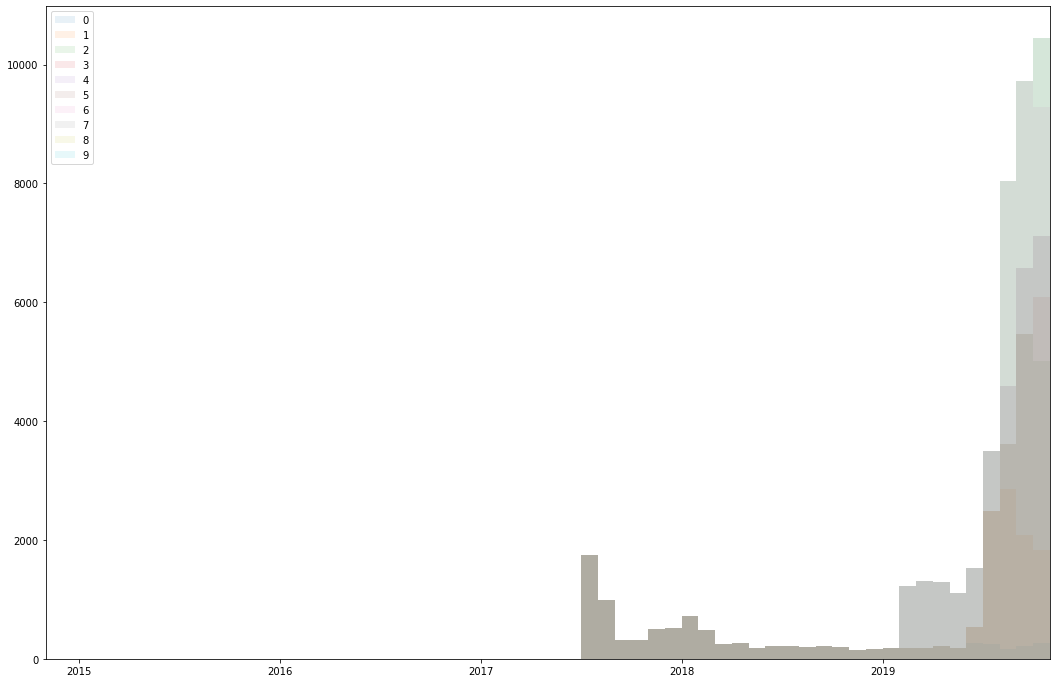

In [195]:
import datetime
import matplotlib.pyplot as plt
def get_dates(category_df, divider):
    category_dates = []
    for d in divider:
        category_acct = []
        for i, date in enumerate(list(category_df["date"])):
            if i <= d:
                category_acct.append(datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S'))
            else:
                break
        category_dates.append(category_acct)
    return category_dates

dates = get_dates(airlines, al_divider)
fig = plt.figure(figsize=(18, 12))
for i in range(10):
    plt.hist(dates[i], bins = 60, range=(datetime.datetime(2014, 11, 1), datetime.datetime(2019, 11, 1)), alpha=0.1, label=str(i))
plt.xlim([datetime.datetime(2014, 11, 1), datetime.datetime(2019, 11, 1)])
plt.legend()
plt.show()

In [197]:
%matplotlib inline

import numpy as np
import random
import sys
import io
import requests as rq
from bs4 import BeautifulSoup
import keras
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import RMSprop
from datetime import datetime
%load_ext tensorboard

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [207]:
news_list = list(news['text'])
print(len(news_list))
text = ""
for i in range(10):
    for j in range(1000):
        text += " " + str(news_list[i*10000 + j])
print(text[:500])

100000
 Toilet paper is always free. Students at this college are asking: Why not tampons? Ken Cuccinelli walked into a bar. And Martin O’Malley lit into him. Review: KFC’s Nashville chicken and waffles is a sticky situation Perspective: Have different politics from your family? Here’s how to survive Thanksgiving. Potluck etiquette: All you need to know before you plop a casserole on the table Analysis: A short journey into the MAGA Internet’s obsession with Swole Trump Silent Sam will stay off the Uni


In [208]:
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Q1: What is the purpose of this block? When is `char_indices` used? What about `indices_char`?
# A1: the purpose of this block is to store the indices at which each character can be found and to store the characters
# at each index so that we can use this as input data for our generative text program
# char_indices is used when we want to determine at which index to place a particular character
# indices_char is used when we want to determine which character to put at a particular index
chars = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# Q2: What is the purpose of this block? What does the `seqlen` and `step` parameters do?
# A2: the purpose of this block is to break up our sentence generation work into bite-size chunks
# the code is saying that we will only generate 40 characters at a time
# seqlen tells us how many characters  to we want total and step tells us how many characters each sequence
# we generate will have while step helps us move through each part of the text in order to generate new sequences
seqlen = 40
step = seqlen
sentences = []
for i in range(0, len(text) - seqlen - 1, step):
    sentences.append(text[i: i + seqlen + 1])

# Q3: What about this block? What is `x` and what is `y`? Why do they have this dimensionality?
# A3: This block vectorizes the input and output data because the network does not work by inputting actual text.
# Therefore, we must represent each character in each sequence as a one-hot vector of boolean values. We can
# picture this as a three-dimensional block, or we can think about the x and y indexing as 
# first: sentence index,
# second: letter index within the sequence
# third: index in character vec of bools (whether or not the current character is a "a", "b", "c", ..., "space", etc.)
# the dimensionality of these vectors x and y is therefore 3
x = np.zeros((len(sentences), seqlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), seqlen, len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    # Q3a: What happens in this loop?
    for t, (char_in, char_out) in enumerate(zip(sentence[:-1], sentence[1:])):
        x[i, t, char_indices[char_in]] = 1
        y[i, t, char_indices[char_out]] = 1


# Q4: Here we build the model. What does the `return_sequences` argument do? Why the dense layer at the end?
# A4: the return sequences argument lets us allow the generated text to be outputted when we run the model so
# that we can see how our network is performing. If we flip it to False, we actually get a dimension mismatch error
# because we get all the input data instead of input data that is split up, sentence-by-sentence
# the dense layer at the end is essential to make the input data comply with the shape that is expected
# without it, the shape is (40, 83), but we need a shape of (40, 128), so it adds a layer of neurons which fine-tunes each 
# character prediction
model = Sequential()
model.add(LSTM(128, input_shape=(seqlen, len(chars)), return_sequences=True))
model.add(Dense(len(chars), activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.01),
    metrics=['categorical_crossentropy', 'accuracy']
)

def sample(preds, temperature=1.0):
    """Helper function to sample an index from a probability array."""
    preds = np.asarray(preds).astype('float64')
    preds = np.exp(np.log(preds) / temperature)  # softmax
    preds = preds / np.sum(preds)                #
    probas = np.random.multinomial(1, preds, 1)  # sample index
    return np.argmax(probas)                     #


def on_epoch_end(epoch, _):
    """Function invoked at end of each epoch. Prints generated text."""
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(text) - seqlen - 1)
    
    # Q5: What does diversity do?
    # A5: diversity helps the network hesitantly generate unique output. 0.2 is not much diversity, so if the network says "Well, look here", 
    # the network might generate text that looks something like "Well, looke her", and then on the next iteration with diversity = 0.5,
    # the network generates text that diverges from the input data a little more, and then when we get to 1.0, we fully diverge from the
    # input text but the hope is that the style is still derived from that of Pulp Fiction
    for diversity in [0.2, 0.5, 1.0]:
        print('----- diversity:', diversity)

        generated = ''
        sentence = text[start_index: start_index + seqlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x_pred = np.zeros((1, seqlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.
            
            # What is the dimensionality of `preds`? Why do we input `preds[0, -1]` to the `sample` function?
            preds = model.predict(x_pred, verbose=0)
            next_index = sample(preds[0, -1], diversity)
            next_char = indices_char[next_index]

            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

model.fit(x, y,
          batch_size=128,
          epochs=50,
          callbacks=[print_callback, tensorboard_callback])

%tensorboard --logdir logs/scalars

Epoch 1/50
32758/32758 [==============================] - 41s 1ms/step - loss: 2.4824 - categorical_crossentropy: 2.4824 - accuracy: 0.3151

----- Generating text after Epoch: 0
----- diversity: 0.2
----- Generating with seed: "man to give away Thanksgiving dinner to "
man to give away Thanksgiving dinner to a protest of the president on the in a the was his the president and has a the conding to the president and the was a prosed the fires and a mare a president and the was the was a from the call and the in the was a the was in the president say a a protest and the state of the was the with the was a stoped and the could whith the fire a president sourge to a fire a sunder and the expent and the was
----- diversity: 0.5
----- Generating with seed: "man to give away Thanksgiving dinner to "
man to give away Thanksgiving dinner to the collice and the said for a the belice work in the report the fired to shan a president on she a leader to lookers from the pander on official are on the 

32758/32758 [==============================] - 52s 2ms/step - loss: 1.5088 - categorical_crossentropy: 1.5088 - accuracy: 0.5635

----- Generating text after Epoch: 9
----- diversity: 0.2
----- Generating with seed: "out PewDiePie for having the most subscr"
out PewDiePie for having the most subscription and a train and the most in the state and the country and considered a former the residents are state to the company to a charged with the state and the state with the company for a state of the whistleblower and the company to protests and a mission of the company for the president starting the world in the president of the state and the state and a the state of the probe says the state th
----- diversity: 0.5
----- Generating with seed: "out PewDiePie for having the most subscr"
out PewDiePie for having the most subscries and discriminations of book A says https://www.bostol.com/wwwwhiene.n._sn_sclassuition is a nations of American of the woman in Markles of the most of the related a

32758/32758 [==============================] - 40s 1ms/step - loss: 1.4618 - categorical_crossentropy: 1.4618 - accuracy: 0.5755

----- Generating text after Epoch: 18
----- diversity: 0.2
----- Generating with seed: "orruption charges, faces a new test from"
orruption charges, faces a new test from the started the first prosecutors in the state of the first presidential candidates have been a contracted to the first prosecutors and the world of the first prosecutors and contracted to the U.S. and the candidates the state of the first prosecutors are a start of the presidential candidates with the first the president to the world of the state of the started the country of the U.S. and the wo
----- diversity: 0.5
----- Generating with seed: "orruption charges, faces a new test from"
orruption charges, faces a new test from the country to the China dead to expand] http://bbc.in/2Dc29dd Former Baran for him. How says https://cnn.it/35mk8w A death of the National Security China star is dis

32758/32758 [==============================] - 47s 1ms/step - loss: 1.4424 - categorical_crossentropy: 1.4424 - accuracy: 0.5797

----- Generating text after Epoch: 27
----- diversity: 0.2
----- Generating with seed: "ian_blase and @aaronyelowitz Times Squar"
ian_blase and @aaronyelowitz Times Square and a conspiracy their statements and confront to provide the first to the first to her story of the first time to explain he was a confront of the United States of the first to the confession of the country are the president and the first time to the country in the presidential candidates have been for the country of the presidential candidates have a confront to constructive and a strategy of 
----- diversity: 0.5
----- Generating with seed: "ian_blase and @aaronyelowitz Times Squar"
ian_blase and @aaronyelowitz Times Square and a presidential candidates and drivers with the tradition of a state of a group in a connection in the 2020 political said. https://nyti.ms/2OC7P6H U.S. to court 

32758/32758 [==============================] - 77s 2ms/step - loss: 1.4316 - categorical_crossentropy: 1.4316 - accuracy: 0.5830

----- Generating text after Epoch: 36
----- diversity: 0.2
----- Generating with seed: "then where are the refugees? A dog drove"
then where are the refugees? A dog drove a started the started to the started the support to conspiracy theories and the committee in the matter https://cnn.it/2Oto3SB A the protest police said the world in the first the president and the state of the first time to be a former Chinese in the state of the first time to the impeachment inquiry in the propo and an experience of the matter to the first the protest to the connection of the i
----- diversity: 0.5
----- Generating with seed: "then where are the refugees? A dog drove"
then where are the refugees? A dog drove the propo at the "going to do it was a decision to review of the impeachment inquiry of the football says he was challenged to conspiracy theories to pleaded with a v

32758/32758 [==============================] - 77s 2ms/step - loss: 1.4250 - categorical_crossentropy: 1.4250 - accuracy: 0.5841

----- Generating text after Epoch: 45
----- diversity: 0.2
----- Generating with seed: "ite House and the Office of Management a"
ite House and the Office of Management and Biden and the home to residential candidates are sentenced to the community of the U.S. seeking the state of the president of the most of the president of a state of the company in the U.S. and the community of the first police says he was a state of a some of the end of the most of the first the U.S. and the U.S. and the company is a startup to the U.S. and the company on the man and the first
----- diversity: 0.5
----- Generating with seed: "ite House and the Office of Management a"
ite House and the Office of Management and Kanye West has been a deadline with season be at student investigators say the Navy could are help back on the leader of the impeachment inquiry: Medicare and the s